In [4]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.6/site-packages/cryptography/hazmat/backends/openssl/x509.py:18: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
    100% |████████████████████████████████| 19.2MB 1.8MB/s 
    100% |████████████████████████████████| 61kB 19.6MB/s 
  Using cached https://files.pythonhosted.org/packages/73/86/43fa9f15c5b9fb6e82620428827cd3c284aa933431405d1bcf5231ae3d3e/cligj-0.7.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cc/0e/d27d6e806d6c0d1a2cfdc5d1f088e42339a0a54a09c3343f7f81ec8947ea/snuggs-1.4.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e9/da/824b92d9942f4e472702488857914bdd50f73021efea15b4cad9aca8ecef/click_plugins-1.1.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 102kB 7.8MB/s 
    100% |█████

In [ ]:
# !pip install sdd-segmentation
# from sdd_segmentation.sdd import sdd_threshold_selection

In [5]:
%%shell
wget -c https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
conda install -q -y --prefix /usr/local python=3.6 gdal

--2023-03-18 14:33:58--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...

In [ ]:
# !pip install imageio.v3

In [ ]:
# !pip install -U scikit-image

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# from rasterio.plot import show

In [7]:
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from osgeo import gdal_array
from osgeo import gdalconst


FILENAME = r"orig_img.tif"

In [8]:
def show_image(image):
    f = plt.figure(figsize=(10, 10))  
    plt.imshow(image)
    plt.show()  

In [9]:
def get_image_RGB(filename):
    image = gdal.Open(filename)
    # As, there are 3 bands, we will store in 3 different variables 
    band_1 = image.GetRasterBand(1) # red channel  
    band_2 = image.GetRasterBand(2) # green channel  
    band_3 = image.GetRasterBand(3) # blue channel   
    #band_4 = image.GetRasterBand(4) # alpha channel
    b1 = band_1.ReadAsArray()  
    b2 = band_2.ReadAsArray()  
    b3 = band_3.ReadAsArray()
    # b4 = band_4.ReadAsArray()
    # Normalize input image to range [0, 255]
    normalized_b1 = cv2.normalize(b1, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    normalized_b2 = cv2.normalize(b2, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)  
    normalized_b3 = cv2.normalize(b3, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return np.dstack((normalized_b1, normalized_b2, normalized_b3))


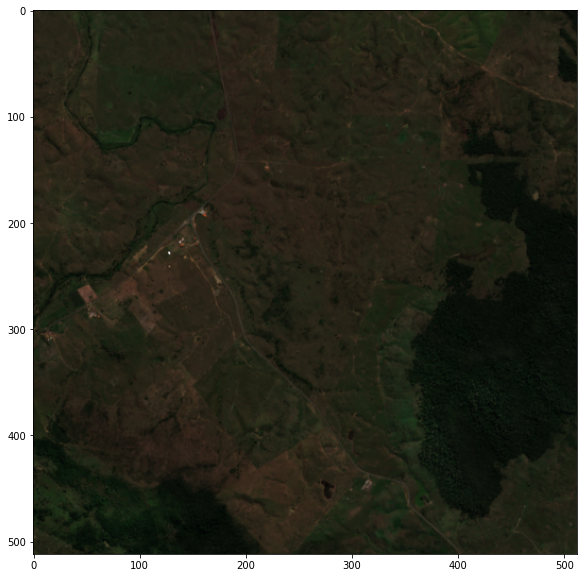

In [10]:
image_RGB = get_image_RGB(FILENAME)
show_image(image_RGB)

In [11]:
def print_info_image(filename):
    image = gdal.Open(filename)
    image_arr = image.ReadAsArray()
    print(f'Image as array:', f'dtype: {image_arr.dtype}, shape: {image_arr.shape}, min: {np.min(image_arr)}, max: {np.max(image_arr)}')
    print("Driver: {}/{}".format(image.GetDriver().ShortName,
                                image.GetDriver().LongName))
    print("Size is {} x {} x {}".format(image.RasterXSize,
                                        image.RasterYSize,
                                        image.RasterCount))
    print("Projection is {}".format(image.GetProjection()))
    print("Metadata: {}".format(image.GetMetadata()))
    geotransform = image.GetGeoTransform()
    if geotransform:
        print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
        print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))
        

In [12]:
print_info_image(FILENAME)

Image as array: dtype: uint16, shape: (4, 512, 512), min: 10, max: 6249
Driver: GTiff/GeoTIFF
Size is 512 x 512 x 4
Projection is PROJCS["WGS 84 / UTM zone 24S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32724"]]
Metadata: {'AREA_OR_POINT': 'Area'}
Origin = (405080.0, 8274420.0)
Pixel Size = (10.0, -10.0)


In [13]:
def otsu_method(image):
    # For debuging use cv2_imshow
    # Applying Otsu's method setting the flag value into cv.THRESH_OTSU.
    # Use a bimodal image as an input.
    # Optimal threshold value is determined automatically.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # denoise the image with a Gaussian filter
    blurred_image = cv2.GaussianBlur(gray,(5,5),0)

    otsu_threshold, image_result = cv2.threshold(
        blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU,
    )

    # Remove noise and fill holes in the binary image using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    closed = cv2.morphologyEx(image_result, cv2.MORPH_OPEN, kernel)

    return closed


def draw_contours(thresh, image):
    # Find the contours in the input image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    # Draw the contours on an image
    contour_img = cv2.drawContours(image, contours, -1, (0, 255, 0), 5)

    return contour_img

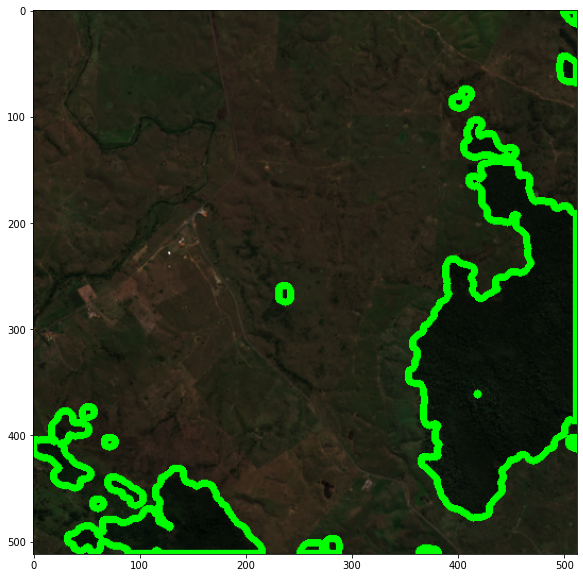

In [22]:
show_image(draw_contours(otsu_method(get_image_RGB(FILENAME)), get_image_RGB(FILENAME)))

Area: 32438, Width: 159, Height: 337
[INFO] examining component 6/17


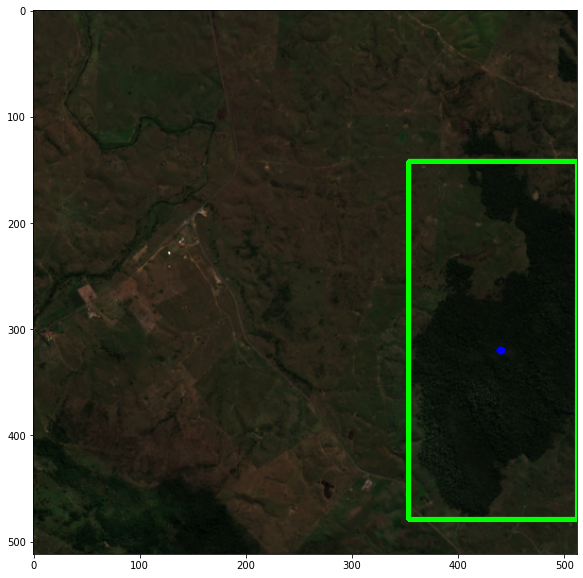

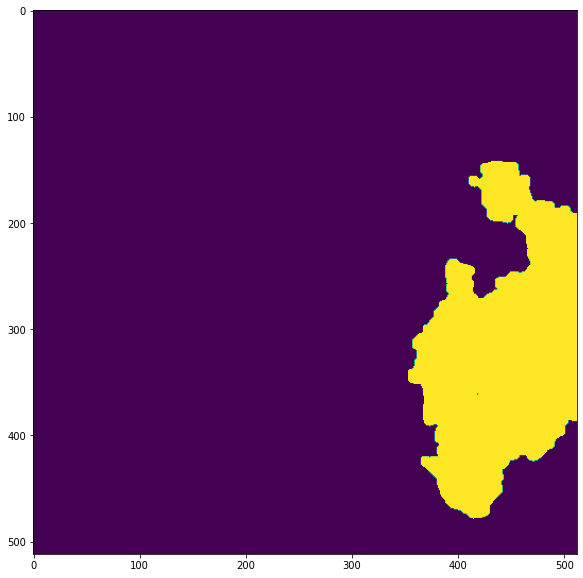

Area: 1890, Width: 55, Height: 74
[INFO] examining component 9/17


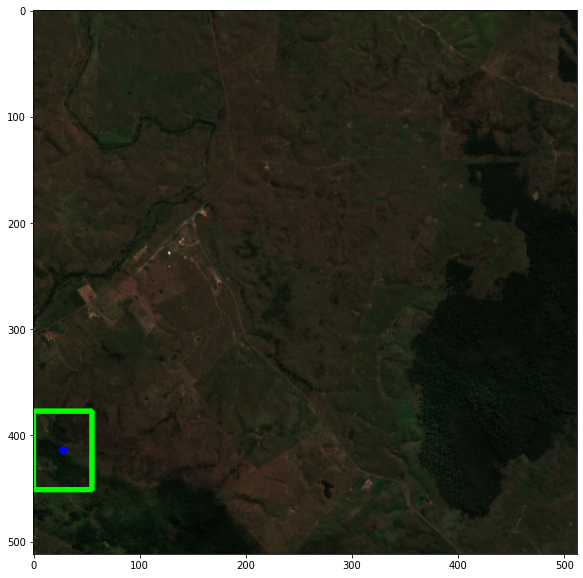

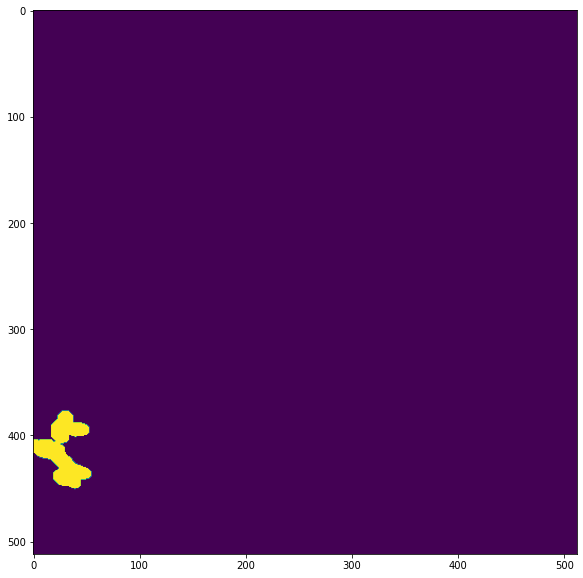

Area: 7426, Width: 184, Height: 81
[INFO] examining component 12/17


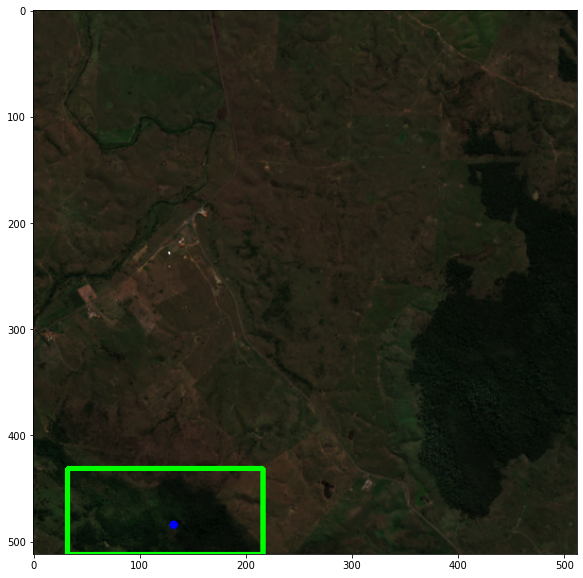

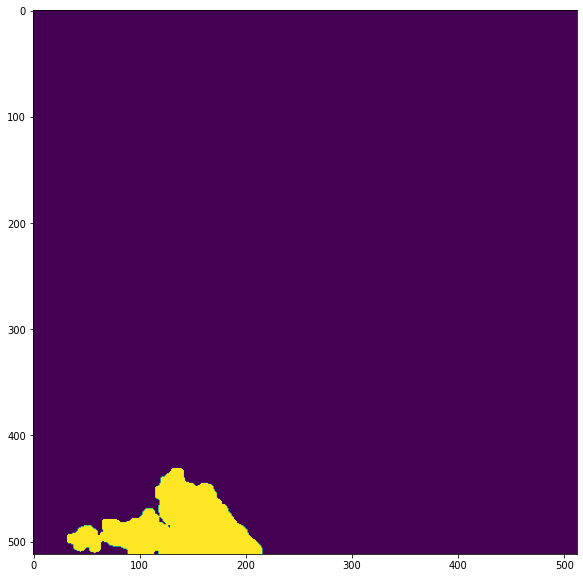

In [15]:
def connected_components(filename, sigma=1.0, connectivity=2):
    image = get_image_RGB(filename)

    closed = otsu_method(image)

    # perform connected component analysis
    # apply connected component analysis to the thresholded image
    output = cv2.connectedComponentsWithStats(closed, connectivity, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output
    # initialize an output mask to store all forests parsed from
    # the image
    mask = np.zeros(image.shape, dtype="uint8")
    # loop over the number of unique connected component labels
    for i in range(1, numLabels):
      # extract the connected component statistics and centroid for
      # the current label
      x = stats[i, cv2.CC_STAT_LEFT]
      y = stats[i, cv2.CC_STAT_TOP]
      w = stats[i, cv2.CC_STAT_WIDTH]
      h = stats[i, cv2.CC_STAT_HEIGHT]
      area = stats[i, cv2.CC_STAT_AREA]
      # ensure the width, height, and area are all neither too small
      # nor too big
      keepWidth = w > 50
      keepHeight = h > 50
      keepArea = area > 250
      (cX, cY) = centroids[i]
      # ensure the connected component we are examining passes all
      # three tests
      if all((keepWidth, keepHeight, keepArea)):
        # if this is the first component then we examine the
        # *background* (typically we would just ignore this
        # component in our loop)
        print("Area: {}, Width: {}, Height: {}".format(area, w, h))
        if i == 0:
          text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
        # otherwise, we are examining an actual connected component
        else:
          text = "examining component {}/{}".format( i + 1, numLabels)
        # print a status message update for the current connected
        # component
        print("[INFO] {}".format(text))
        # clone our original image (so we can draw on it) and then draw
        # a bounding box surrounding the connected component along with
        # a circle corresponding to the centroid
        output = image.copy()
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
        # construct a mask for the current connected component by
        # finding a pixels in the labels array that have the current
        # connected component ID
        componentMask = (labels == i).astype("uint8") * 255
        # show our output image and connected component mask
        show_image(output)
        show_image(componentMask)

connected_components(FILENAME, sigma=2.0, connectivity=8)

Area: 32438, Width: 159, Height: 337
[INFO] examining component 6/17
Area: 1890, Width: 55, Height: 74
[INFO] examining component 9/17
Area: 7426, Width: 184, Height: 81
[INFO] examining component 12/17


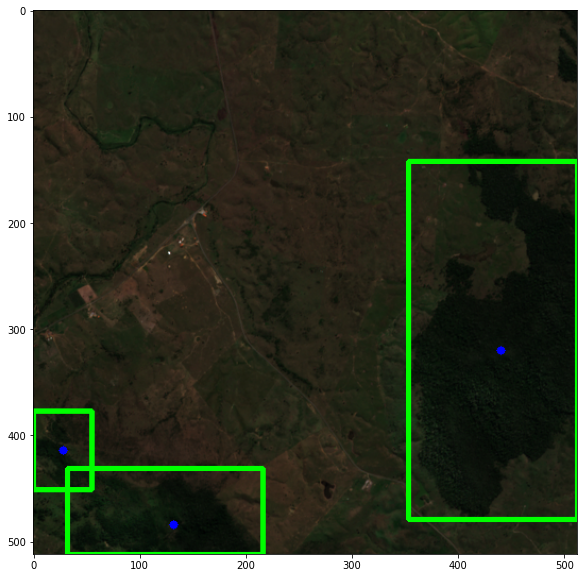

In [16]:
def connected_components(filename, connectivity=2):
    image = get_image_RGB(filename)
    # clone our original image (so we can draw on it) and then draw
    # a bounding box surrounding the connected component along with
    # a circle corresponding to the centroid
    output_image = image.copy()
    # convert the image to grayscale
    closed = otsu_method(image)

    # perform connected component analysis
    # apply connected component analysis to the thresholded image
    output = cv2.connectedComponentsWithStats(closed, connectivity, cv2.CV_32S)
    (numLabels, labels, stats, centroids) = output
    # initialize an output mask to store all forests parsed from
    # the image
    mask = np.zeros(image.shape, dtype="uint8")
    # loop over the number of unique connected component labels
    for i in range(1, numLabels):
      # extract the connected component statistics and centroid for
      # the current label
      x = stats[i, cv2.CC_STAT_LEFT]
      y = stats[i, cv2.CC_STAT_TOP]
      w = stats[i, cv2.CC_STAT_WIDTH]
      h = stats[i, cv2.CC_STAT_HEIGHT]
      area = stats[i, cv2.CC_STAT_AREA]
      # ensure the width, height, and area are all neither too small
      # nor too big
      keepWidth = w > 50
      keepHeight = h > 50
      keepArea = area > 250
      (cX, cY) = centroids[i]
      # ensure the connected component we are examining passes all
      # three tests
      if all((keepWidth, keepHeight, keepArea)):
        # if this is the first component then we examine the
        # *background* (typically we would just ignore this
        # component in our loop)
        print("Area: {}, Width: {}, Height: {}".format(area, w, h))
        if i == 0:
          text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
        # otherwise, we are examining an actual connected component
        else:
          text = "examining component {}/{}".format( i + 1, numLabels)
        # print a status message update for the current connected
        # component
        print("[INFO] {}".format(text))
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.circle(output_image, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    # show our output image and connected component mask
    show_image(output_image)
    plt.imsave(r"CCA.png", output_image)

connected_components(FILENAME, connectivity=8) # sigma=2.0, 

In [17]:
def NDVI(image_file, t_pixel_forest=0.1, t_is_forest=0.3):
    ds = gdal.Open(image_file)
    red_band = ds.GetRasterBand(1).ReadAsArray().astype(np.float32)
    # If there is NIR_band on the second band we use NIR_band, if not, then we use green
    NIR_band = ds.GetRasterBand(2).ReadAsArray().astype(np.float32) 

    # calculate NDVI
    ndvi = (NIR_band - red_band) / (NIR_band + red_band)

    # classify pixels as forest or non-forest based on a threshold value
    forest_mask = np.where(ndvi >= t_pixel_forest, 1, 0)
    forest_percent = np.average(forest_mask)
    print(forest_percent)
    
    # classify the image based on the percentage of forest cover
    is_forest = True
    if forest_percent >= t_is_forest:
        print('The image contains a forest')
    else:
        is_forest = False
        print('The image does not contain a forest')

    return is_forest

NDVI(r"test.tif")
NDVI(FILENAME)

0.10997390747070312
The image does not contain a forest
0.3076629638671875
The image contains a forest


True

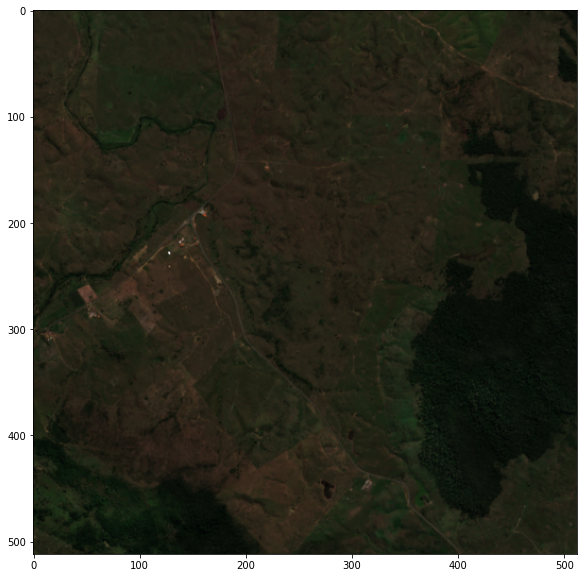

In [18]:
show_image(get_image_RGB(FILENAME))

0.10997390747070312
The image does not contain a forest


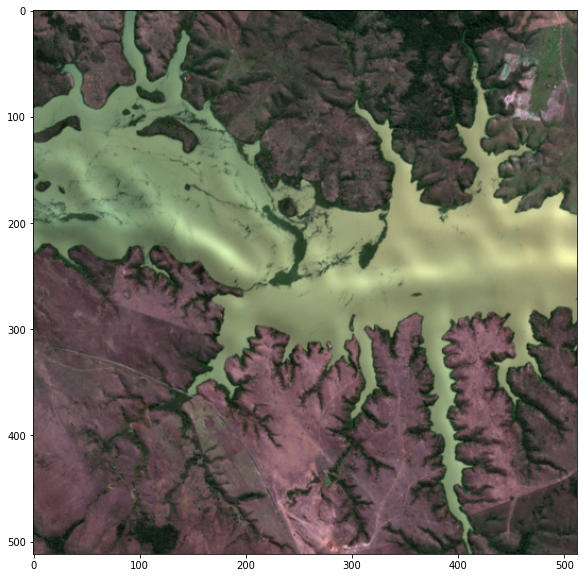

In [24]:
def main(image_file):
  if NDVI(image_file):
    connected_components(image_file)
    show_image(draw_contours(otsu_method(get_image_RGB(image_file)), get_image_RGB(image_file)))
  else:
    show_image(get_image_RGB(image_file))

main(r"test.tif")